# The Sparks Foundation

### Name - Khin Nyo Nyo Theint

## Task 1: To predict score if a student studies for 9.25Hr/Day

Predicting the score percentage of a student based on the no. of study hours.


## Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [7]:
datadir = "http://bit.ly/w-data"
data = pd.read_csv(datadir)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Drop missing values

In [8]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


## Visualizing Data

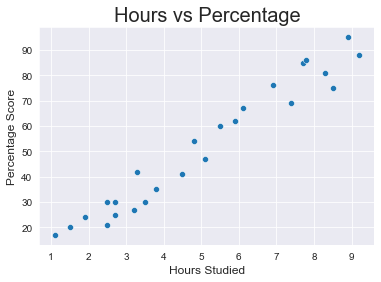

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Hours vs Percentage', size=20)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Percentage Score', size=12)  
plt.show()

### The graph shows a Linear Relation between Hours and Scores.

# Training Model

##  Splitting Data

In [11]:
# Preparing X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data into training data and validation data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

##  Fitting Data into model

In [12]:
from sklearn.linear_model import LinearRegression
d_model = LinearRegression()
d_model.fit(train_X, train_y)
print('Trained the model.')

Trained the model.


In [13]:
# Plotting the regression line
line = d_model.coef_*X+d_model.intercept_

## Visualising Training Data

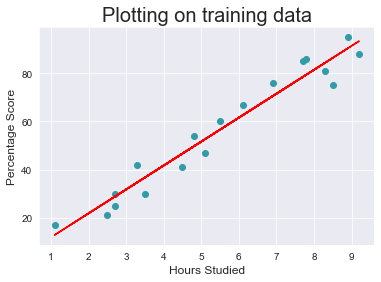

In [14]:
plt.scatter(train_X , train_y , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.title('Plotting on training data', size=20)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Percentage Score', size=12)  
plt.show()

## Predicting on validation data

In [15]:
predict_y = d_model.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing Prediction Vs Actual Data

In [16]:
compare = pd.DataFrame({'Hours': [i[0] for i in val_X],'Actual Score': val_y, 'Predicted Score': predict_y})  
compare

,Hours,Actual Score,Predicted Score
0,1.5,20,16.844722
1,3.2,27,33.745575
2,7.4,69,75.500624
3,2.5,30,26.786400
4,5.9,62,60.588106
5,3.8,35,39.710582
6,1.9,24,20.821393


## Visualising Comparison of Predicted Scores  and  Actual Scores

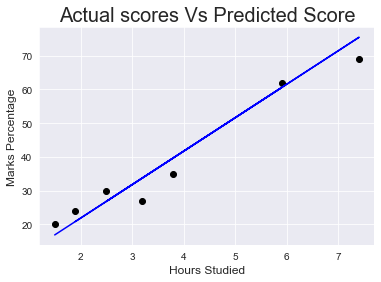

In [17]:
plt.scatter(x=val_X, y=val_y, color='black')
plt.plot(val_X, predict_y, color = 'blue')
plt.title('Actual scores Vs Predicted Score', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Visualizing the accuracy of the model

In [18]:
d_sorted = compare.sort_values(by = "Hours")
d_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.844722
6,1.9,24,20.821393
3,2.5,30,26.786400
1,3.2,27,33.745575
5,3.8,35,39.710582
4,5.9,62,60.588106
2,7.4,69,75.500624


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


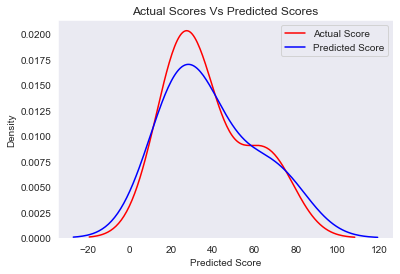

In [19]:
title = "Actual Scores Vs Predicted Scores"
ax1 = sns.distplot(d_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(d_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

## Evaluating the model

In [20]:
#calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', 
      mean_absolute_error(val_y, predict_y)) 

Mean Absolute Error: 4.130879918502486


## Predicting score of a student if he/she studies for 9.25 hrs/ day

In [21]:
hours = [9.25]
answer = d_model.predict([hours])
print("If a student studies for 9.25hrs/day, predicted score is {}.".format(round(answer[0],5)))

If a student studies for 9.25hrs/day, predicted score is 93.89273.
